In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import cv2 as cv
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train 
X_test = X_test 

# Y_train = to_categorical(Y_train)
# Y_test = to_categorical(Y_test)
Y_train[0]

5

In [3]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(X_train[0][10][10])

1


In [5]:
m_tr = X_train.shape[0]
m_ts = X_test.shape[0]
width, height = X_train.shape[1:]
print(width, "x", height)

28 x 28


(28, 28)
1


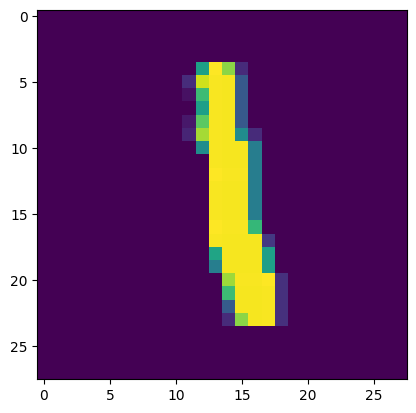

In [6]:
# sample from dataset
sample = 6
print(X_train[sample].shape)

print(Y_train[sample])
plt.imshow(X_train[sample])
plt.show()
# np.argmax(model.predict(X_train[sample].reshape(1, width, height)))

(28, 28)


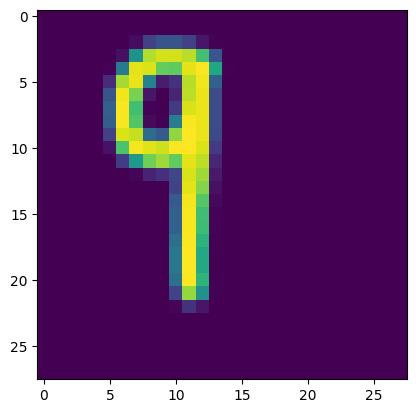

In [7]:
# just verifing with own samples

reduced_img = plt.imread('reduced.png')
print(reduced_img.shape)
plt.imshow(reduced_img)
plt.show()

In [8]:
# Creating a model in tensorflow

model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    layers.Dense(250, activation='sigmoid'),
    layers.Dense(150, activation='sigmoid'),

    layers.Dense(10, activation='linear')
], name="s1")

In [9]:
model.summary()


Model: "s1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 150)               37650     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 235,410
Trainable params: 235,410
Non-trainable params: 0
_________________________________________________________________


In [10]:

model.compile(
    
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [11]:
model.fit(X_train, Y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4560 - sparse_categorical_accuracy: 0.8736
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3095 - sparse_categorical_accuracy: 0.9051
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2844 - sparse_categorical_accuracy: 0.9118
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - sparse_categorical_accuracy: 0.9195
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2318 - sparse_categorical_accuracy: 0.9272
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2191 - sparse_categorical_accuracy: 0.9321
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2057 - sparse_categorical_accuracy: 0.9365
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1957 - sparse_categorical_accuracy: 0.9391
Epoch 9/10
1875/1875 [==========

In [12]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

# model.save('digit_recognizer_2.h5')


313/313 - 0s - loss: 0.1747 - sparse_categorical_accuracy: 0.9471 - 485ms/epoch - 2ms/step


255


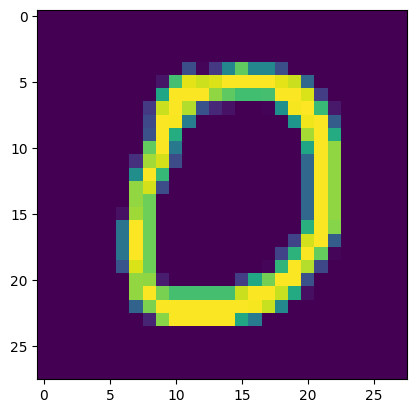

ValueError: in user code:

    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "s1" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer "s1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=uint8)
      • training=False
      • mask=None


In [13]:


test_sample = 10
test_imag = X_test[test_sample]
plt.imshow(test_imag)
print(np.amax(test_imag))
plt.show()
yhat = model.predict(test_imag)
prediction = tf.nn.softmax(yhat)
print(prediction)
print(np.argmax(prediction))

255.0
1/1 [==============================] - 0s 61ms/step
6
6


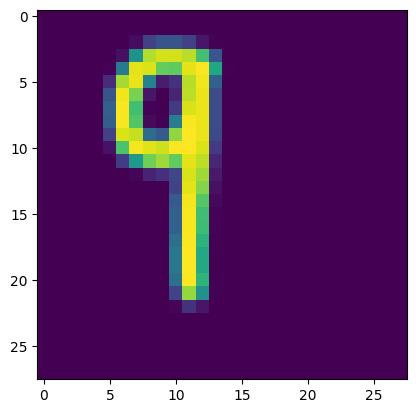

In [ ]:
test_image = plt.imread('reduced.png') * 255
print(np.amax(test_image))
yhat = model.predict(test_image)
plt.imshow(test_image)
print(np.argmax(yhat))
print(np.argmax(tf.nn.softmax(yhat)))